# End to end Multi-class Dog Breed Classification

## 1. Problem
Indentifying the breed of a dog an image of dog

## 2. Data

https://www.kaggle.com/competitions/dog-breed-identification/data

## 3. Evaluation

A file with prediction probalibities for each dog breed of each test image.

## 4. Features

Some information about the data:
* images (unstructed data)
* There are 120 breeds of dogs (this means there are 120 different classes)
* There are around 10,000+ images in the training set
(these images have labels)
* There are around 10,000+ images in the test set
(These images have no labels, because we want to predict them)

In [1]:
#Unzip uploaded data into Google Drive
#!unzip "/content/drive/MyDrive/Dog Vision/dog-breed-identification.zip" -d "drive/My Drive/Dog Vision/"

In [2]:
import tensorflow as tf
import tensorflow_hub as hub
print("TF version: ", tf.__version__)
print("TF Hub version: ", hub.__version__)

# Check for GPU avalibity
print("GPU", "available łiii" if tf.config.list_physical_devices("GPU") else "not available")

TF version:  2.17.1
TF Hub version:  0.16.1
GPU available łiii


In [3]:
## W środowisku wykonawczym możemy zmienić typ na GPU

# Access Data - turning into tensors

With all machine lerning models, out data has to be in numerical format

1. Turning images into Tensors (numerical arrays)

In [4]:
# Ctrl M M - do komórki tekstu
# Ctrl M Y - do komórki kodu
# Ctrl M H - skróty klawiszowe
# Ctrl Shift Space - dokumentacja

In [5]:
import pandas as pd
labels_csv = pd.read_csv("drive/MyDrive/Dog Vision/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [6]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


<Axes: xlabel='breed'>

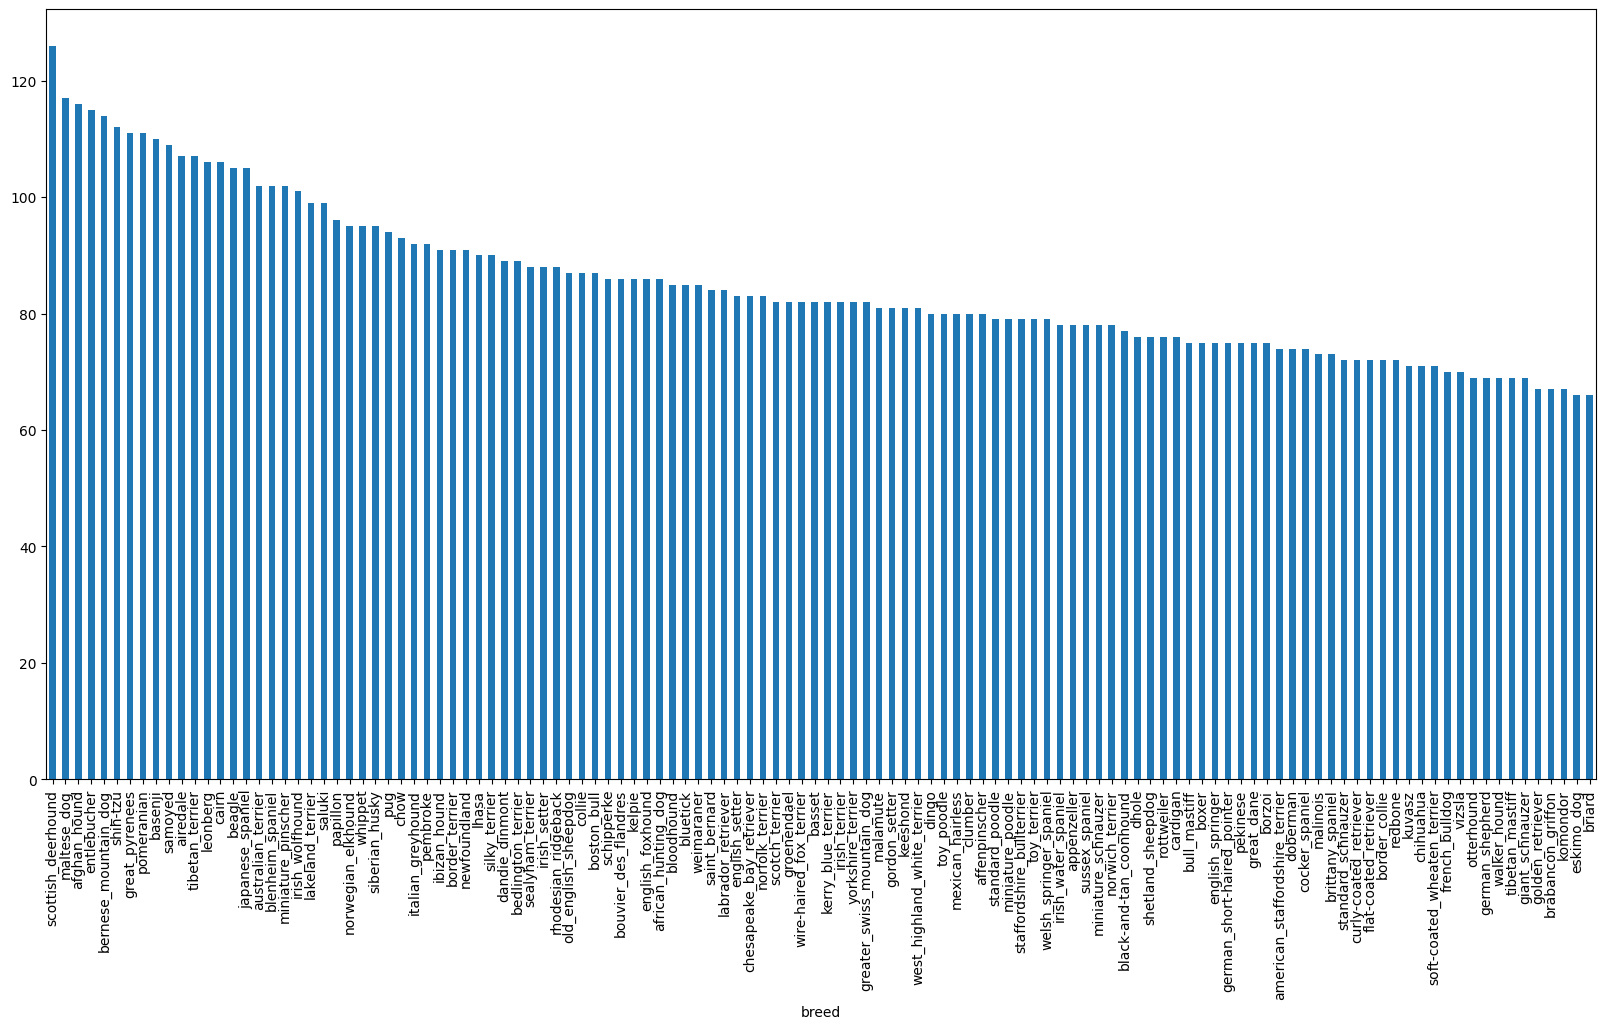

In [7]:
# How many images are there of each breads?
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))

In [8]:
labels_csv["breed"].value_counts().median() #better median

82.0

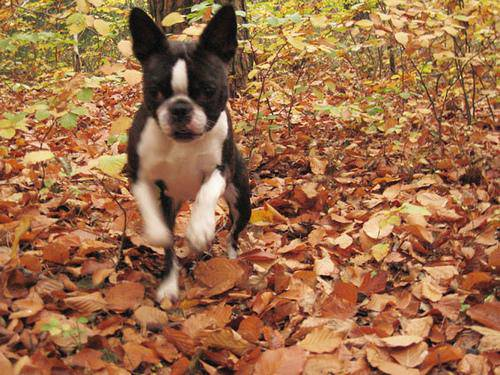

In [9]:
# View an image
from IPython.display import Image
Image("drive/MyDrive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

array([[[108,  46,   0],
        [152,  92,  42],
        [180, 120,  70],
        ...,
        [176, 144,  69],
        [189, 157,  82],
        [214, 182, 107]],

       [[151,  93,  47],
        [179, 121,  75],
        [167, 111,  64],
        ...,
        [167, 136,  56],
        [172, 139,  60],
        [188, 157,  77]],

       [[151,  98,  56],
        [188, 137,  94],
        [162, 113,  70],
        ...,
        [200, 168,  81],
        [196, 162,  75],
        [200, 168,  81]],

       ...,

       [[189, 122,  69],
        [186, 119,  66],
        [183, 116,  63],
        ...,
        [213, 160, 106],
        [212, 159, 107],
        [209, 156, 102]],

       [[186, 119,  66],
        [184, 117,  64],
        [183, 116,  63],
        ...,
        [197, 145,  88],
        [199, 146,  92],
        [199, 147,  90]],

       [[182, 115,  62],
        [181, 114,  61],
        [183, 116,  63],
        ...,
        [184, 132,  74],
        [190, 138,  81],
        [192, 140,  82]]], dtype=uint8)
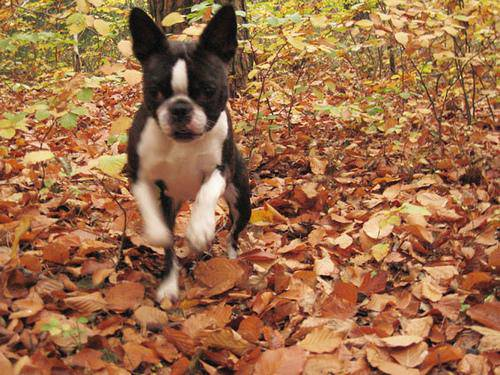

In [10]:
# Można też w matplotlib
from matplotlib.pyplot import imread

image = imread("drive/MyDrive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg")
image

### Getting images and their labels

In [11]:
#Create pathnames
filenames = ["drive/MyDrive/Dog Vision/train/" + id + ".jpg" for id in labels_csv["id"]]
filenames[:10]

['drive/MyDrive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [12]:
# Checking if numbers of filenames matches number of actual image file
import os

if len(os.listdir("drive/MyDrive/Dog Vision/train/")) == len(filenames): #os.listdir - dostep do wszystkich plikow
  print("Filenames match actual amount of files")

Filenames match actual amount of files


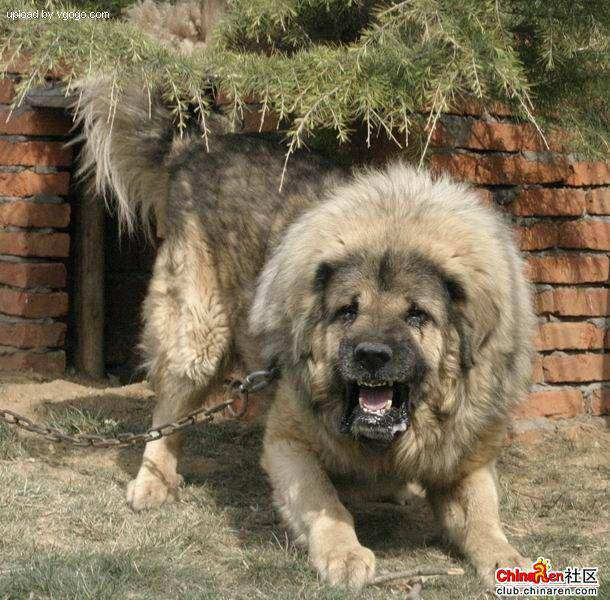

In [13]:
#one more check
Image(filenames[9000])

## Turning Data Labels into Numbers

In [14]:
import numpy as np
labels = labels_csv["breed"].to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [15]:
len(labels)

10222

In [16]:
#Check if number of labels matches the numbers of filenames
if len(labels) == len(filenames):
  print("Yes")

Yes


In [17]:
# Find the unique labels
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [18]:
# Turn every label into an array of booleans
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [19]:
len(boolean_labels)

10222

In [20]:
# Example: Turning boolean array into integers
print(labels[0])
print(np.where(unique_breeds == labels[0])) #index where labels occurs
print(boolean_labels[0].argmax()) #index where index occurs in boolean array
print(boolean_labels[0].astype(int)) #there will be a 1 where the sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### Creating our own validation set

In [21]:
#Setup X and y
X = filenames
y = boolean_labels

## We going to start experimenting with ~1000 images and increase as needed

In [22]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 # @param {type:"slider", min:1000, max:10000, step:1000 }
# param możemy zmieniać sliderem z prawej strony

In [23]:
#Splittin into train and validation sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42
                                                  )
len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [24]:
# Leths have a geez at the traing data
X_train[:2], y_train[:2]

(['drive/MyDrive/Dog Vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/MyDrive/Dog Vision/train/0d2f9e12a2611d911d91a339074c8154.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, Fal

## Preprocess Images - turning images into Tensors

1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable `image`
3. Turn out `image` into Tensors
4. Resize the `image` to be a shape of (224,224)
5. Return the modified `image`



In [25]:
# Convert image to NumPy array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [26]:
print(image) # Values between 0 and 255 - RGB

[[[ 89 137  89]
  [ 76 124  76]
  [ 63 111  61]
  ...
  [ 77 133  86]
  [ 76 134  86]
  [ 76 134  86]]

 [[ 72 119  75]
  [ 67 114  68]
  [ 63 110  64]
  ...
  [ 75 131  84]
  [ 74 132  84]
  [ 74 132  84]]

 [[ 56 104  66]
  [ 58 106  68]
  [ 64 112  74]
  ...
  [ 71 127  82]
  [ 73 129  84]
  [ 74 130  85]]

 ...

 [[  2  11  10]
  [  5  14  11]
  [  8  14  14]
  ...
  [120 113  67]
  [126 118  71]
  [122 114  67]]

 [[  0   3   7]
  [  2   7  10]
  [  3   9   7]
  ...
  [105  98  54]
  [112 104  58]
  [111 103  57]]

 [[ 16  18  30]
  [ 16  19  24]
  [ 15  20  14]
  ...
  [101  92  51]
  [ 97  88  47]
  [120 111  70]]]


In [27]:
#Zmiana na Tensor
tf.constant(image)

<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]],

       [[ 56, 104,  66],
        [ 58, 106,  68],
        [ 64, 112,  74],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 74, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  11],
        [  8,  14,  14],
        ...,
        [120, 113,  67],
        [126, 118,  71],
        [122, 114,  67]],

       [[  0,   3,   7],
        [  2,   7,  10],
        [  3,   9,   7],
        ...,
        [105,  98,  54],
        [112, 104,  58],
        [111, 103,  57]],

       [[ 16,  18,  30],
        [ 16,  19,  24],
        [ 15,  20,  14],
        ...,
        [101,  92,  5

## Function to preprocess all images

In [28]:
IMG_SIZE = 224

def process_image(image_path, img_size = IMG_SIZE):
  image = tf.io.read_file(image_path) #funkcja z tensor do wczytywania zdjęć
  #Turn into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, 3)
  #Convert the coulour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32) #Computin process more efficient
  #Resize the image(224,224)
  image = tf.image.resize(image, size = [img_size, img_size])
  return image



## Transform data into Batches max size 32 to well process

In [29]:
# Tensor `(image, label)`
#Create function to return this tuple

def get_image_label(image_path, label):
  image = process_image(image_path)
  return image, tf.constant(label) #zeby label tez była tensorem

In [30]:
BATCH_SIZE = 32

def create_data_batches(X,y=None, batch_size = BATCH_SIZE, valid_data = False, test_data = False):
  """
  Creates batches of data out of image X and label y paris
  Shuffles the data if it's training data, but doesn't shuffle if it's validation data
  Also accpet test data as input (no labels)
  """
  #If the data is test dataset
  if test_data:
    print("Creating test data batches..")
    data = tf.data.Dataset.from_tensor_slices(tf.constant(X)) #funkcja robiaca batches
    data_batch = data.map(process_image).batch(batch_size) #process image funkcja wyzej
    return data_batch

  #If the data is a valid dataset we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches..")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
    data_batch = data.map(get_image_label).batch(batch_size) #funkcja map wywołuje funkcje get_image_label na każdym naszym obiekcie
    return data_batch

  else:
    print("Creating trainin data batches...")
    #Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
    #Shuffling pathnames and labels before mapping image processor function
    data = data.shuffle(buffer_size=len(X)) #shuffle wszystko
    data = data.map(get_image_label)
    data_batch = data.batch(batch_size)
    return data_batch



In [31]:
#Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data = True)

Creating trainin data batches...
Creating validation data batches..


In [33]:
#Check out different atributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

# Visualizing Data Batches

In [46]:
import matplotlib.pyplot as plt

#Creating a function for viewing images in a data batch

def show_25_images(images, labels):
  plt.figure(figsize=(10,10))
  for i in range(25):
    #Create subplots (5 rows, 5 columns, index)
    ax = plt.subplot(5,5,i+1)
    #Display an image
    plt.imshow(images[i])
    #Add the image label as a title
    plt.title(unique_breeds[labels[i].argmax()])
    plt.axis("off")


In [35]:
train_data #format of batch, must be turn in iterator

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [38]:
train_images, train_labels = next(train_data.as_numpy_iterator())
train_images, train_labels

(array([[[[8.50158855e-02, 1.23286188e-01, 1.86712146e-02],
          [3.54094766e-02, 7.07036033e-02, 0.00000000e+00],
          [5.02801165e-02, 8.15766975e-02, 1.18763158e-02],
          ...,
          [1.60142958e-01, 1.26033306e-01, 6.61772266e-02],
          [1.35924146e-01, 1.10258974e-01, 7.16385543e-02],
          [8.90755281e-02, 7.33892545e-02, 3.80951352e-02]],
 
         [[1.33186400e-01, 1.68480530e-01, 5.60786873e-02],
          [1.32084098e-02, 4.56663966e-02, 0.00000000e+00],
          [1.19413078e-01, 1.47862270e-01, 7.27387816e-02],
          ...,
          [1.61379650e-01, 1.24422617e-01, 7.35644773e-02],
          [1.97194666e-01, 1.70237958e-01, 1.32048056e-01],
          [1.60259008e-01, 1.36064321e-01, 1.03606343e-01]],
 
         [[1.29545242e-01, 1.60112485e-01, 7.55536556e-02],
          [4.28712107e-02, 7.01121092e-02, 2.02768459e-03],
          [4.97633442e-02, 7.61585906e-02, 1.72650330e-02],
          ...,
          [1.66443005e-01, 1.27857536e-01, 8.2094

In [39]:
len(train_images), len(train_labels)

(32, 32)

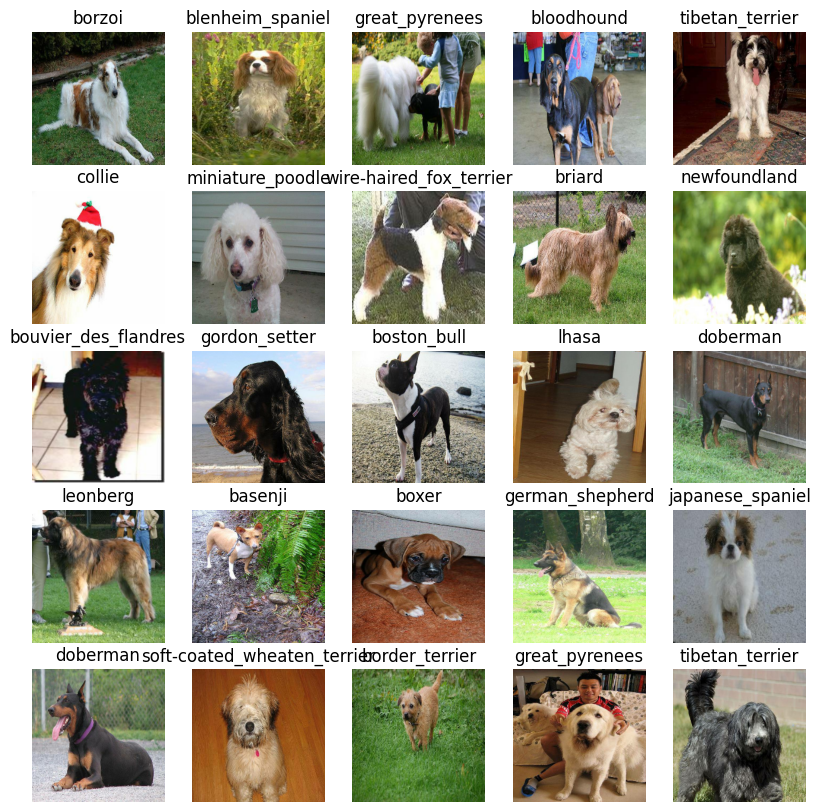

In [47]:
# Visualize the data in a training batch
show_25_images(train_images, train_labels)

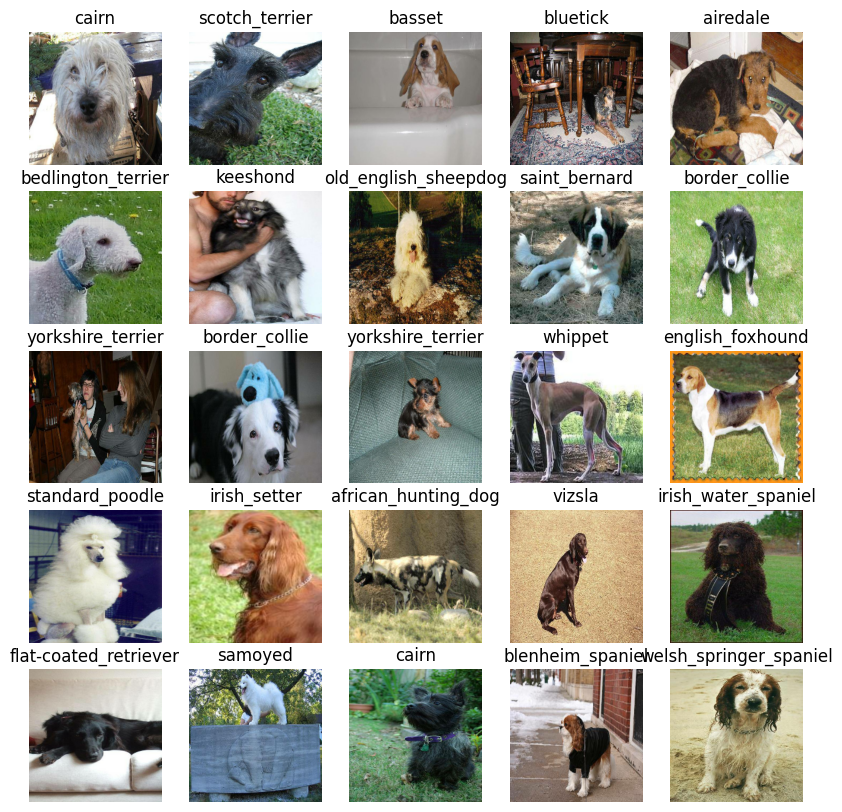

In [48]:
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## Building a model

* The input shape (our images shape, in the form of Tensors) to our model
* The output shape (image labels, in the form of Tensors) of our model
* The URL of the model we want to use

In [49]:
#Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] #batch height width collor channels

#setup output shape model
OUTPUT_SHAPE = len(unique_breeds)

#Setup model Url from TensorFlow Hub
MODEL_URL = ...